### Table of Experiments

#### exp1
- `nux = (2-10)`
- `gamma = [8-15]`
- `number of TRN Neurons = [500, 1000]`
-  No Additional supressional activity at 1000ms for 50ms

#### exp2
- `nux = (2-10)`
- `gamma = [8-15]`
- `number of TRN Neurons = [500, 1000]`
-  Additional supressional activity at 1000ms for 50ms

In [1]:
# To get the lastest pickle files run
! cat pullresults.sh

#!/bin/bash

rsync -auv hameed@login.inm.kfa-juelich.de:/users/hameed/simulenation/src/demyelination/data/ /home/hunaid/simulenation/src/demyelination/data/



In [1]:
import warnings
warnings.filterwarnings('ignore') # warnings are for the weak

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import os
import sys
import re
import sys

In [3]:
sys.path.append("demyelination/") # we need this to successfully read pickle files

In [4]:
import fna

In [22]:
import pipeline as pipeline

In [11]:
def preparedf (dataobjs):
    # input dataframe
    # output organized data
    if len(dataobjs) == 0:
        raise Exception("No activity files found.")

    parts = dataobjs[0].spikeobj.keys()

    df = pd.DataFrame()

    for part in parts:
        for data in dataobjs:
            data.spikeobj[part].time_offset(250)
            tmp = data.params
            tmp = tmp.update({
                "brainPart" : part,
                "meanSpkRate" : data.spikeobj[part].mean_rate(),
                "pearsonCoeff" : data.metrics['pearsoncoeff'][part],
                "cvIsi" : data.spikeobj[part].cv_isi().mean()
            })
            df = df.append(data.params, ignore_index=True)

    #sortingParams = ["gamma", "nux"]
    #df = df.sort_values(by=sortingParams)

    return df

In [28]:

def makesubplot (data, fig, ax, attr):
    for axis, part in zip([0, 1], ["MGN", "TRN"]):
        d = data[ data["brainPart"] == part ].pivot_table(attr, "exp3_nuX", "gamma")

        p = ax[axis].imshow(d, interpolation="nearest")
        fig.colorbar(p, ax=ax[axis])

        ax[axis].set_title(attr + " " + part)

        ax[axis].set_yticklabels(d.index.values)
        ax[axis].set_xticklabels(d.columns.values)

        ax[axis].set_ylabel("nuX")
        ax[axis].set_xlabel("gamma")


## Exp1

In [45]:
files2 = pipeline.readfiles("demyelination/data/exp2/activity");
df2 = preparedf(files2);

In [47]:
df2[(df2.exp2_nuX == 12) & (df2.gamma == 4) & (df2.nTRN == 500)]

exp2_nuX  gamma   nTRN brainPart  meanSpkRate  pearsonCoeff     cvIsi
81       12.0    4.0  500.0       MGN     8.211783      0.005256  0.644393
225      12.0    4.0  500.0       TRN    17.206266      0.782844  1.190964

In [44]:
df2[(df2.exp1_nuX == 12) & (df2.gamma == 4) & (df2.nTRN == 500)]

exp1_nuX  gamma   nTRN brainPart  meanSpkRate  pearsonCoeff     cvIsi
116      12.0    4.0  500.0       MGN     8.062087     -0.000876  0.626813
260      12.0    4.0  500.0       TRN    11.824502      0.006766  0.623445

In [7]:
files = pipeline.readfiles("demyelination/data/exp3/activity");


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.3
 Built: Mar 23 2022 13:33:55

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

** mayavi.mlab ** package is not installed. To have functions using mayavi.mlab please install the package.
** pyspike ** package is not installed. To have functions using pyspike please install the package.
** pyspike ** package is not installed. To have functions using pyspike please install the package.
** mnist.loader ** package is not installed. To have functions using mnist.loader please install the package.
** tables ** package is not installed. To have functions using tables please install the package.


In [12]:
df = preparedf(files);

In [53]:
#df[df.brainPart == 'TRN'].shape, df.shape
#df.head()
df[((df.brainPart == "MGN") & (df.meanSpkRate > 7.9) & (df.meanSpkRate < 8.1)) | ((df.brainPart == "TRN") & (df.meanSpkRate > 11.7) & (df.meanSpkRate < 11.9))]

exp3_nuX  gamma  wMGN  nuX_stim brainPart  meanSpkRate  pearsonCoeff  \
36        14.0    3.0   3.0      40.0       MGN     7.914313     -0.001161   
96        14.0    9.0   1.0      15.0       MGN     7.940440      0.001757   
132       13.0    7.0   1.0       5.0       MGN     7.919129      0.001596   
137       14.0    6.0   1.5       5.0       MGN     7.965470      0.007300   
271       13.0    7.0   1.0      15.0       MGN     7.926580      0.004715   
...        ...    ...   ...       ...       ...          ...           ...   
7088      12.0    2.0   3.0      35.0       TRN    11.744487      0.005102   
7115      12.0    3.0   1.0      50.0       TRN    11.883565      0.007767   
7159      12.0    2.0   2.0      50.0       TRN    11.820896      0.007383   
7179      12.0    2.0   2.0       5.0       TRN    11.789321      0.008254   
7184      12.0    3.0   2.0      50.0       TRN    11.750326      0.003829   

         cvIsi  
36         NaN  
96         NaN  
132   0.662081  
137        NaN  
271   0.664492  
...        ...  
7088  0.623681  
7115  0.621663  
7159  0.619751  
7179  0.620443  
7184  0.621505  

[178 rows x 8 columns]

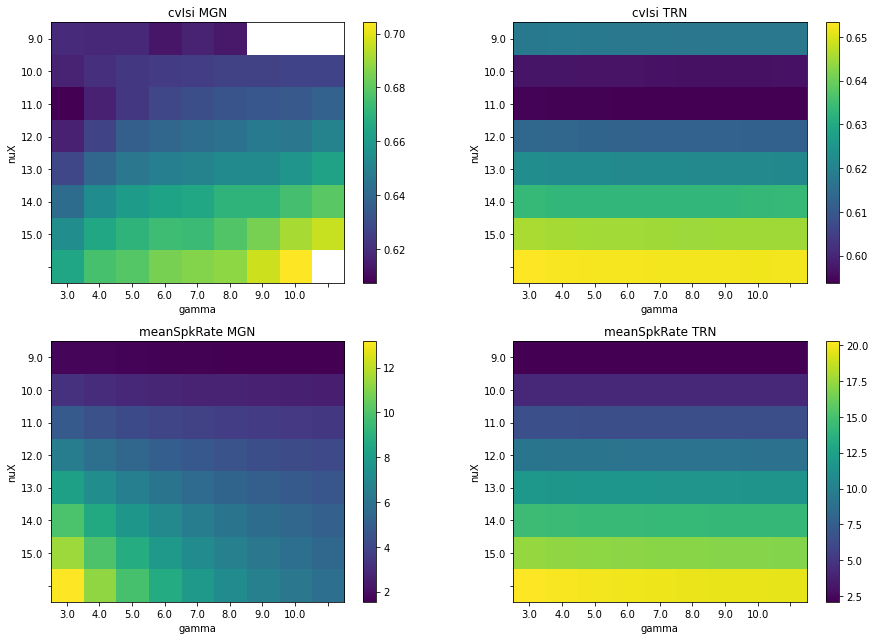

In [32]:
fig, ax = plt.subplots(nrows=2, ncols=2)

fig.set_size_inches(13, 9)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

makesubplot(df, fig, ax[0], "cvIsi")

makesubplot(df, fig, ax[1], "meanSpkRate")

#pipeline.makesubplot(df, fig, ax[2], "pearsonCoeff")

fig.tight_layout()

In [33]:
#! ls demyelination/data/exp3/activity/

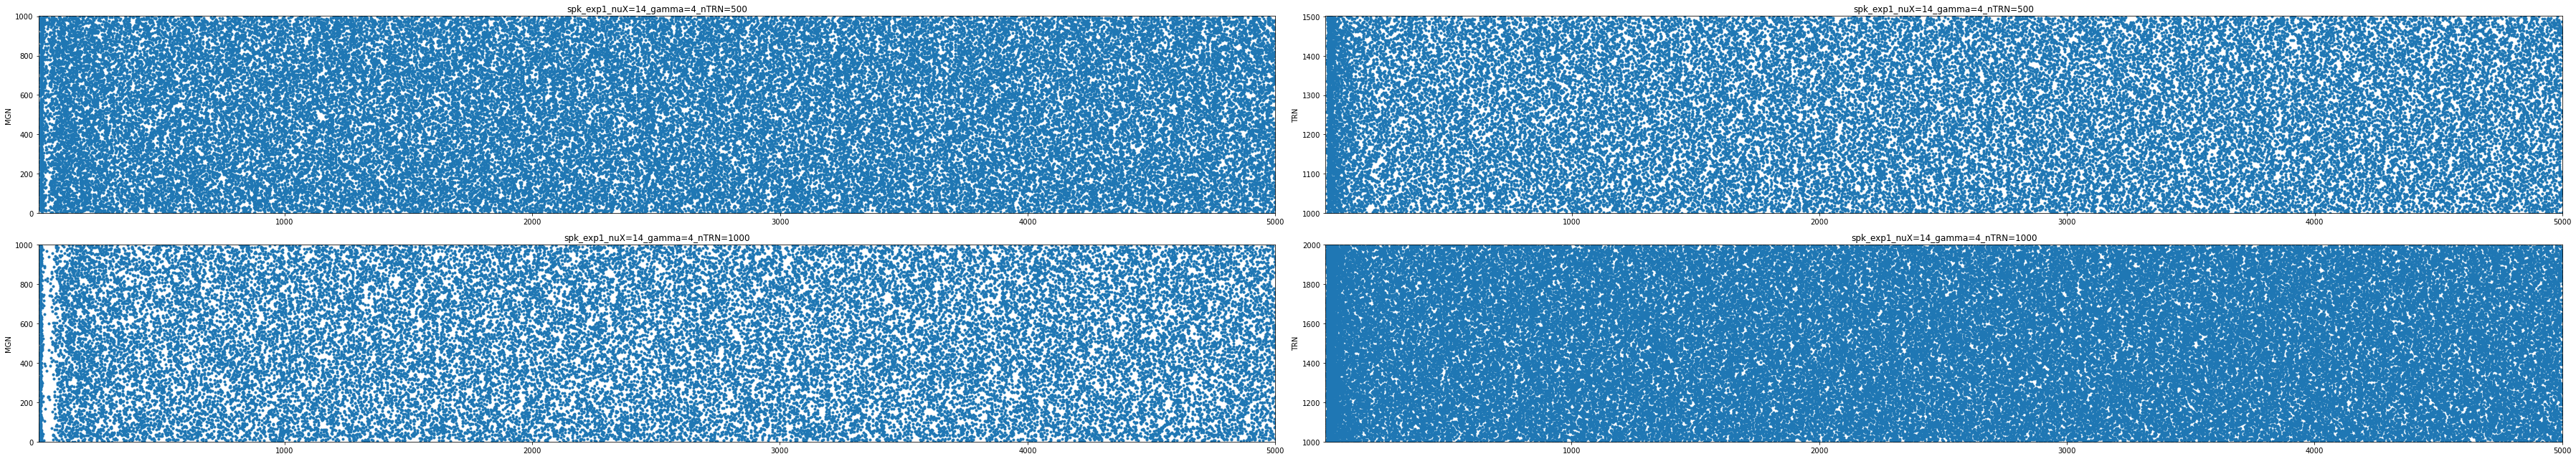

In [17]:
fls = [
    "spk_exp1_nuX=14_gamma=4_nTRN=500",
    "spk_exp1_nuX=14_gamma=4_nTRN=1000",
    ]

fig, ax = plt.subplots(nrows=len(fls), ncols=2)

for idx, fl in enumerate(fls):
    d = pd.read_pickle("demyelination/data/exp1/activity/" + fl)

    fig.set_size_inches(50, 9)
    #plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

    for axis, part in zip([0, 1], d.spikeobj.keys()):
        d.spikeobj[part].raster_plot(ax=ax[idx][axis], dt=10, display=False)
        ax[idx][axis].set_ylabel(part)
        ax[idx][axis].set_title(fl)

fig.tight_layout()

## Exp2

In [44]:
files = pipeline.readfiles("demyelination/data/exp2/activity");
df_sim = preparedf(files, 'exp2');

In [45]:
df_sim

gamma  nux  nTRN brainPart  meanSpkRate  pearsonCoeff     cvIsi
8        2    8  1000       MGN     1.720764      0.002109       NaN
130      2    8   500       MGN     1.865950     -0.001041  0.620675
152      2    8  1000       TRN     6.110610      0.897147  1.859561
274      2    8   500       TRN     6.115123      0.892309  1.865903
58       2    9   500       MGN     3.506504      0.002496  0.613328
..     ...  ...   ...       ...          ...           ...       ...
187     10   14  1000       TRN    22.748844      0.781362  1.178586
116     10   15   500       MGN     8.901396      0.035330  0.820027
127     10   15  1000       MGN     3.880454      0.123539  1.172265
260     10   15   500       TRN    26.236982      0.780742  1.176611
271     10   15  1000       TRN    25.753370      0.783614  1.181465

[288 rows x 7 columns]

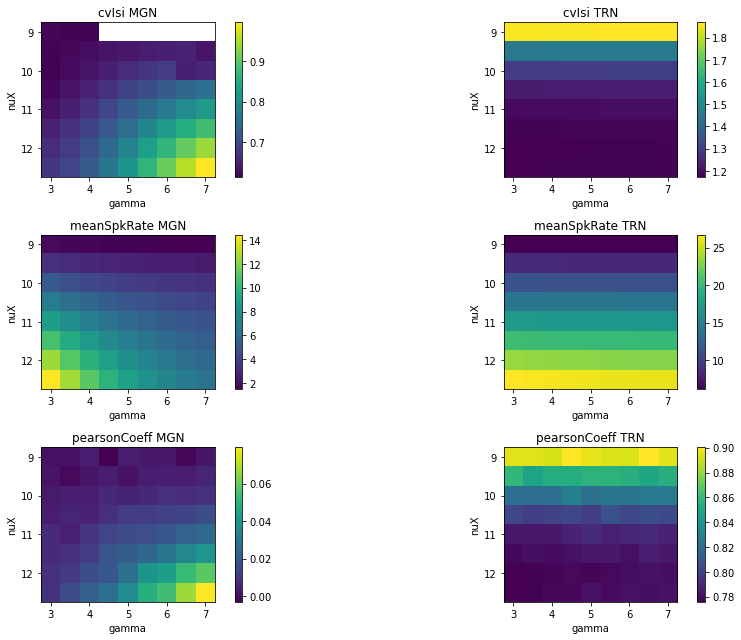

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=2)

fig.set_size_inches(13, 9)
plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

pipeline.makesubplot(df, fig, ax[0], "cvIsi")

pipeline.makesubplot(df, fig, ax[1], "meanSpkRate")

pipeline.makesubplot(df, fig, ax[2], "pearsonCoeff")

fig.tight_layout()

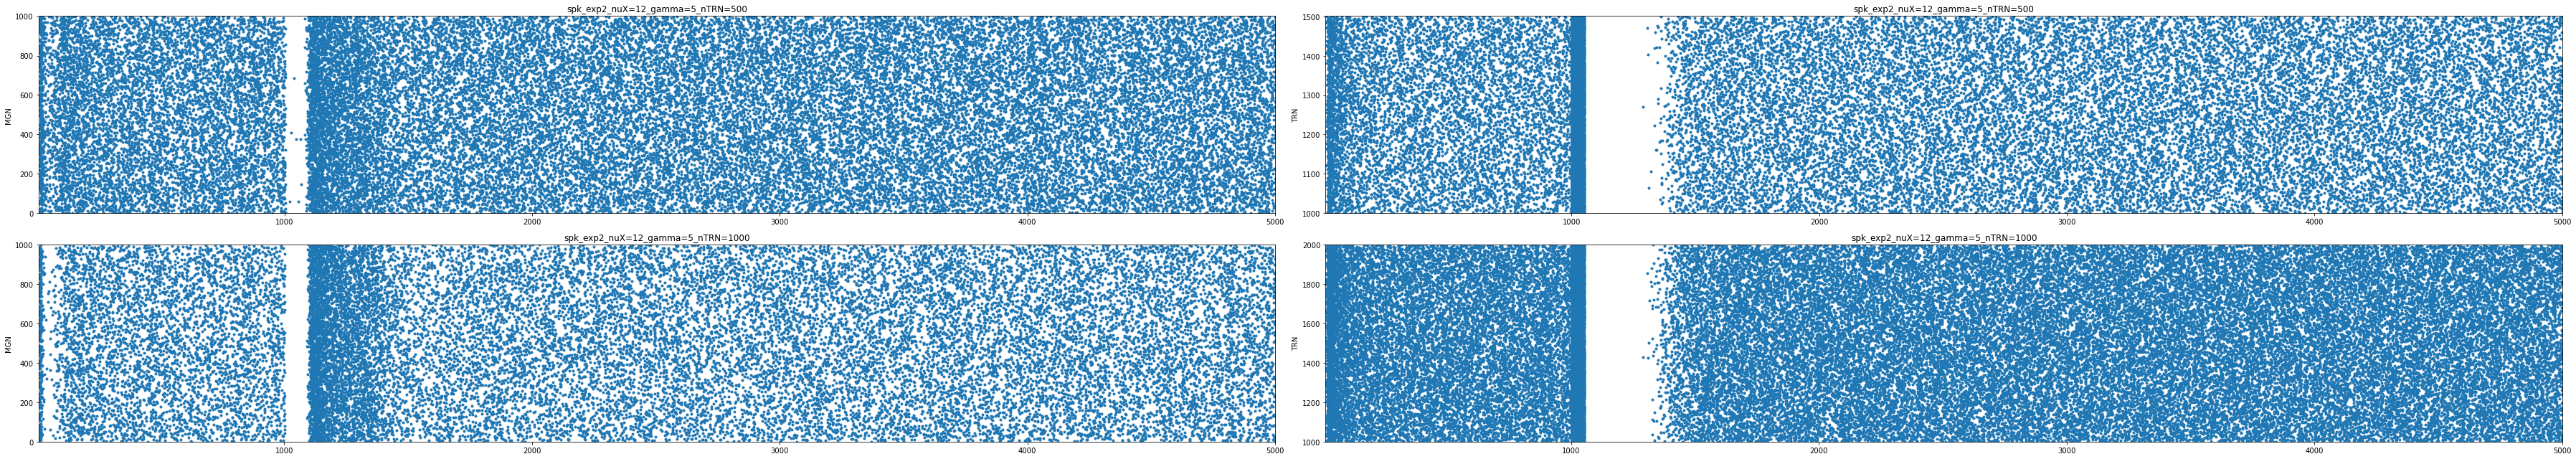

In [46]:
fls = [
    "spk_exp2_nuX=12_gamma=5_nTRN=500",
    "spk_exp2_nuX=12_gamma=5_nTRN=1000",
    ]

fig, ax = plt.subplots(nrows=len(fls), ncols=2)

for idx, fl in enumerate(fls):
    d = pd.read_pickle("demyelination/data/exp2/activity/" + fl)

    fig.set_size_inches(50, 9)
    #plt.subplots_adjust(left=0.01, right=0.03, top=0.03, bottom=0.02)

    for axis, part in zip([0, 1], d.spikeobj.keys()):
        d.spikeobj[part].raster_plot(ax=ax[idx][axis], dt=10, display=False)
        ax[idx][axis].set_ylabel(part)
        ax[idx][axis].set_title(fl)

fig.tight_layout()